<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [2]:
import Pkg
Pkg.add(["Plots","Distributions","Random","Polynomials","Statistics"])
import Distributions as di

    

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


binomial_p (generic function with 1 method)

In [116]:
function binomial_p(n,k,p)
     return (factorial(n)/(factorial(k)*factorial(n-k))) * (p^k) * (1-p)^(n-k)
end

binomial_p (generic function with 1 method)

In [117]:
binomial_p(10,2,0.4)

0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet: 20%

In [11]:
n = 10 
k = 5
p = 0.4
binomial_p(10,5,0.4)

0.20065812480000003

The chance of losing the bet: 80%

In [12]:
1 - binomial_p(10,5,0.4)

0.7993418752

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [ ]:
Losing money because there is a higher chance of getting any other combination of heads and tails than exactly five heads

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [13]:
n = 10
k = 4
p = 0.4
binomial_p(10,4,0.4)

0.250822656

Chance of winning: 25% , Chance of losing: 75%

In [ ]:
Again, I would expect to lose money

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [16]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [46]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [99]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [106]:
using Polynomials
poly_fit = fit(x,y_observed,1)
fit_coeff = coeffs(poly_fit)

2-element Vector{Float64}:
 -2.3323060376569806
  3.1625205153337133

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [107]:
function chisqr(b,m,x,y_observed,sigma)
    return sum(((y_observed .- (m .* x .+ b)).^2) / sigma^2 )
end

chisqr (generic function with 1 method)

In [108]:
chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma)

2.983270981839583

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [102]:
chi2_list = []
for i = 1:10000
    x = 0:1:10
    y_true = 3 .* x .- 2
    sigma = 3
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise;
    using Polynomials
    poly_fit = fit(x,y_observed,1)
    fit_coeff = coeffs(poly_fit)
    push!(chi2_list,chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma))
end


2-element Vector{Float64}:
 -2.3323060376569806
  3.1625205153337133

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [79]:
using Statistics
chi2_mean = mean(chi2_list)

9.030494557145229

A value of 9 for the mean makes sense there are 11 samples (x_values) and 2 variables (x and y) and 11-2 = 9

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

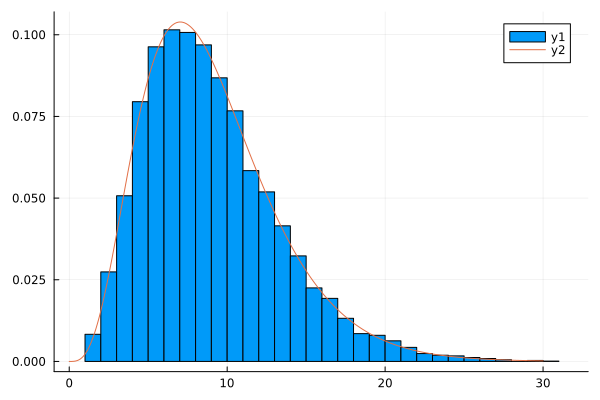

In [109]:
import Distributions as di
using Plots
x_dist = 0:0.1:30
chi2 = di.Chisq(chi2_mean)
chi2_pdf = di.pdf.(chi2,x_dist)
histogram(chi2_list, bins=50,normalize=true)
plot!(x_dist,chi2_pdf)


### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [110]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

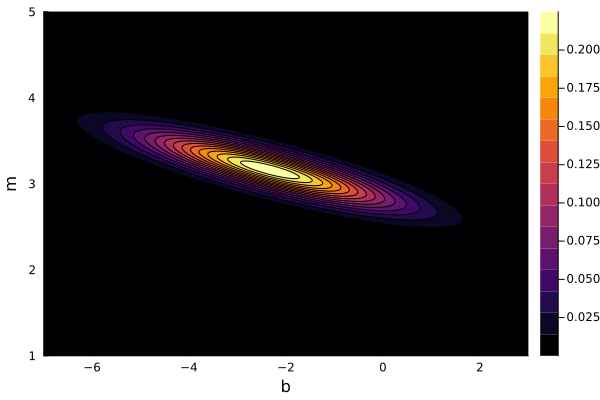

In [111]:
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

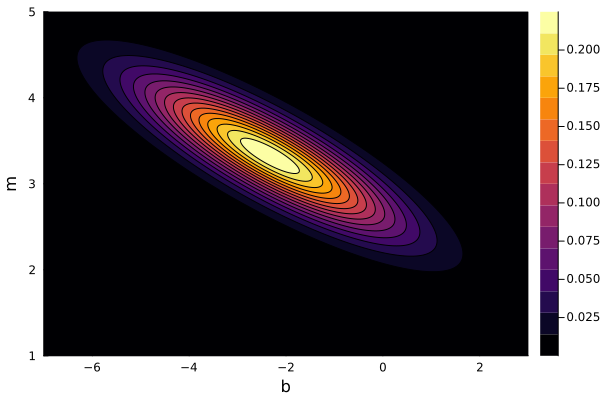

In [112]:
x = 0:0.5:5
y_true = 3 .* x .- 2
y_observed = y_true .+ noise;
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

This plot has a steeper, more negative slope than the 2.6 plot as well as having a larger white/yellow center meaning that the slope varies more and has a higher probability of varying than 2.6 

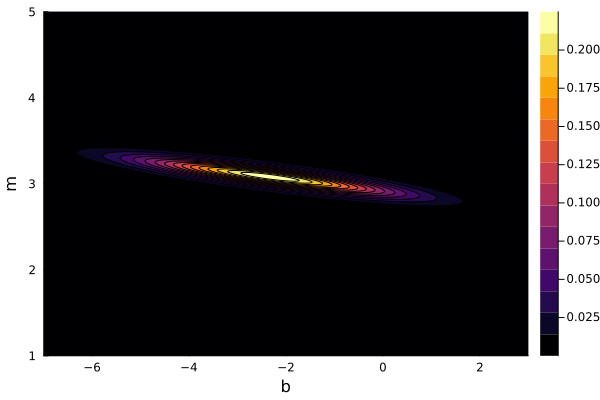

In [113]:
x = 0:2:20
y_true = 3 .* x .- 2
y_observed = y_true .+ noise;
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

This plot is "thinner" than the 2.6 plot and has a slightly more flat slope, meaing that the variation in the slope has a very small probability.

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

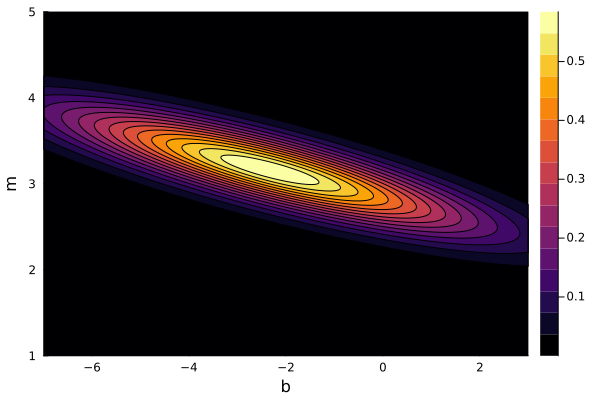

In [114]:
x = 0:1:10
sigma = 5
y_true = 3 .* x .- 2
y_observed = y_true .+ noise;
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")


This plot has a wider range in the b direction, meaning that the intercept has a higher probability to vary when the slope changes. Since the error increased (sigma), the probability of variation in the slope also increased

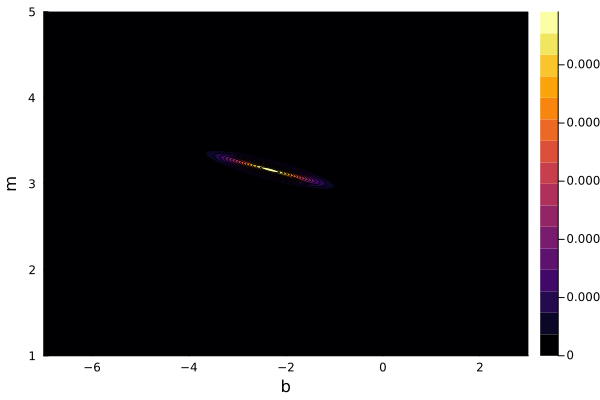

In [115]:
x = 0:1:10
sigma = 1
y_true = 3 .* x .- 2
y_observed = y_true .+ noise;
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

The plot shows that there is very little variation in the slope and the intercept because of the decrease in the error (sigma) value